In [1]:
import numpy as np
import igraph as ig
import matplotlib.pyplot as plt

# Networks

In [95]:
pop = 1000 # Population (Number of nodes)
wsG = ig.Graph.Watts_Strogatz(dim=1, size=pop, nei=5, p=0.5)
erG = ig.Graph.Erdos_Renyi(pop, m=5*pop)
baG = ig.Graph.Barabasi(pop, m=5)

# Centrality

## Degree

In [116]:
degWS = np.array(wsG.vs.degree())
degER = np.array(erG.vs.degree())
degBA = np.array(baG.vs.degree())

print(f'WS mean degree = {degWS.mean()}')
print(f'ER mean degree = {degER.mean()}')
print(f'BA mean degree = {degBA.mean()}\n')

WS mean degree = 10.0
ER mean degree = 10.0
BA mean degree = 9.97



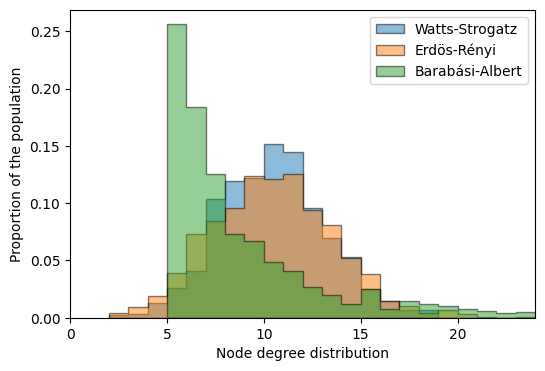

In [97]:
plt.figure(figsize=(6, 4))

kwargs = dict(density = True, alpha = 0.5, histtype='stepfilled', ec = 'black')

plt.hist(degWS, label = 'Watts-Strogatz', bins = degWS.max()-degWS.min(), **kwargs)
plt.hist(degER, label = 'Erdös-Rényi', bins = degER.max()-degER.min(), **kwargs)
plt.hist(degBA, label = 'Barabási-Albert', bins = degBA.max()-degBA.min(), **kwargs)

plt.xlim((0,degWS.max()+5))
plt.xlabel('Node degree distribution')
plt.ylabel('Proportion of the population')

plt.legend()
plt.show()

## Betweenness

In [118]:
betweenWS = np.array(wsG.betweenness())
betweenER = np.array(erG.betweenness())
betweenBA = np.array(baG.betweenness())

print(f'WS mean betweenness = {betweenWS.mean()}')
print(f'ER mean betweenness = {betweenER.mean()}')
print(f'BA mean betweenness = {betweenBA.mean()}\n')

WS mean betweenness = 1134.938
ER mean betweenness = 1126.134
BA mean betweenness = 1014.948



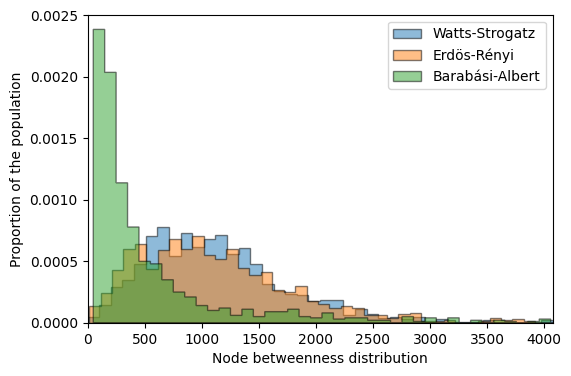

In [112]:
plt.figure(figsize=(6, 4))

kwargs = dict(density = True, alpha = 0.5, histtype='stepfilled', ec = 'black')

binsWS = int(betweenWS.max()-betweenWS.min())//100
binsER = int(betweenER.max()-betweenER.min())//100
binsBA = int(betweenBA.max()-betweenBA.min())//100

plt.hist(betweenWS, label = 'Watts-Strogatz', bins = binsWS, **kwargs)
plt.hist(betweenER, label = 'Erdös-Rényi', bins = binsER, **kwargs)
plt.hist(betweenBA, label = 'Barabási-Albert', bins = binsBA, **kwargs)

plt.xlim((0,int(betweenWS.max())))
plt.xlabel('Node betweenness distribution')
plt.ylabel('Proportion of the population')

plt.legend()
plt.show()

## Diameter

In [119]:
print(f'The diameter of WS graph is: {wsG.diameter()}')
print(f'The diameter of ER graph is: {erG.diameter()}')
print(f'The diameter of BA graph is: {baG.diameter()}\n')

The diameter of WS graph is: 6
The diameter of ER graph is: 5
The diameter of BA graph is: 5

